In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [76]:
data = pd.read_csv('data.csv')

In [77]:
data.head()

,Unnamed: 0,x,y,cluster
0,0,-8.482852,-5.603349,2
1,1,-7.751632,-8.405334,2
2,2,-10.967098,-9.032782,2
3,3,-11.999447,-7.606734,2
4,4,-1.736810,10.478015,1


In [78]:
data['cluster'].value_counts()

cluster
1    67
0    67
2    66
Name: count, dtype: int64

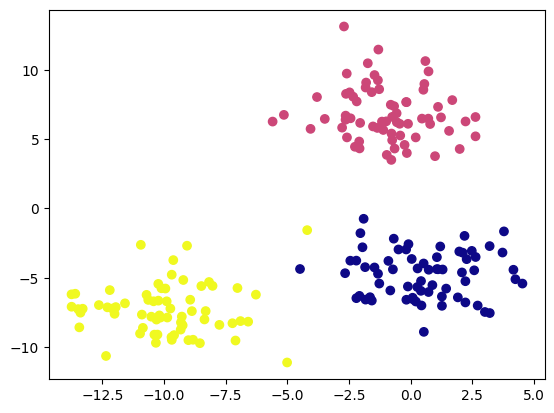

In [79]:
x_ = data['x']
y_ = data['y']
label = data['cluster']
plt.scatter(x_, y_, c = label, cmap = 'plasma')

In [80]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [81]:
x = data[['x','y']]
y = data['cluster']
x.head()

,x,y
0,-8.482852,-5.603349
1,-7.751632,-8.405334
2,-10.967098,-9.032782
3,-11.999447,-7.606734
4,-1.736810,10.478015


In [82]:
# preprocessing
scaler = StandardScaler()
x = scaler.fit_transform(x)
x[:5]

array([[-1.01200363, -0.60606415],
       [-0.86550679, -1.04265203],
       [-1.5097118 , -1.14041707],
       [-1.71653856, -0.91821912],
       [ 0.33953731,  1.89963378]])

In [92]:
kmeans = KMeans(n_clusters=3, random_state=30)
kmeans.fit(x)

KMeans(n_clusters=3, random_state=30)

In [84]:
kmeans.labels_

array([1, 1, 1, 1, 2, 2, 0, 1, 0, 2, 0, 3, 2, 2, 3, 2, 3, 0, 1, 3, 2, 3,
       3, 1, 1, 2, 2, 3, 1, 0, 2, 1, 1, 2, 1, 0, 3, 2, 1, 1, 1, 3, 1, 0,
       1, 1, 1, 2, 3, 2, 3, 0, 0, 2, 2, 2, 3, 1, 2, 2, 3, 2, 3, 3, 3, 2,
       1, 1, 1, 3, 1, 2, 1, 1, 0, 1, 1, 1, 0, 1, 2, 3, 2, 2, 3, 0, 3, 1,
       2, 0, 3, 1, 1, 3, 2, 2, 1, 1, 3, 0, 2, 2, 2, 0, 3, 1, 2, 2, 3, 0,
       3, 1, 0, 2, 2, 2, 2, 1, 3, 1, 2, 0, 2, 0, 2, 2, 2, 0, 0, 3, 1, 3,
       2, 2, 0, 3, 2, 3, 3, 1, 2, 2, 1, 1, 2, 1, 2, 1, 2, 3, 1, 2, 3, 2,
       2, 1, 2, 1, 1, 1, 2, 1, 1, 2, 0, 3, 2, 1, 2, 1, 2, 3, 2, 0, 1, 2,
       2, 1, 1, 2, 3, 1, 3, 1, 1, 1, 3, 1, 1, 3, 2, 3, 3, 3, 2, 1, 0, 2,
       2, 1])

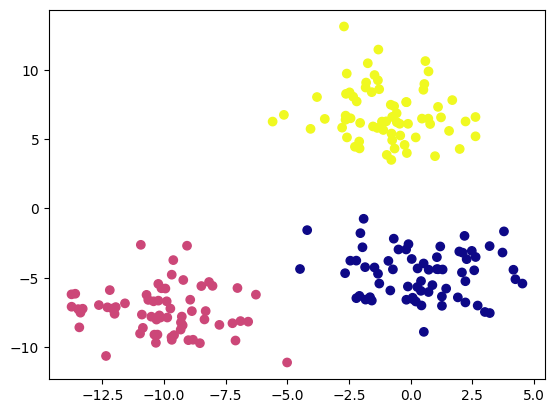

In [93]:
x_ = data['x']
y_ = data['y']
label = kmeans.labels_
plt.scatter(x_, y_, c = label, cmap = 'plasma')

In [88]:
# evaluasi jika tidak mengetahui label yang awal
# 1. sum of squared error

sse= []
index = range(1,10)
for i in index:
    kmeans = KMeans(n_clusters=i, random_state=30)
    kmeans.fit(x)
    sse_ = kmeans.inertia_
    sse.append(sse_)
    print(i, sse_)

1 400.0
2 156.41033617954906
3 44.05704845329278
4 36.7163650547325
5 31.248689816499116
6 25.276935505942134
7 22.705138298357394
8 20.076582184738186
9 17.219164930804524


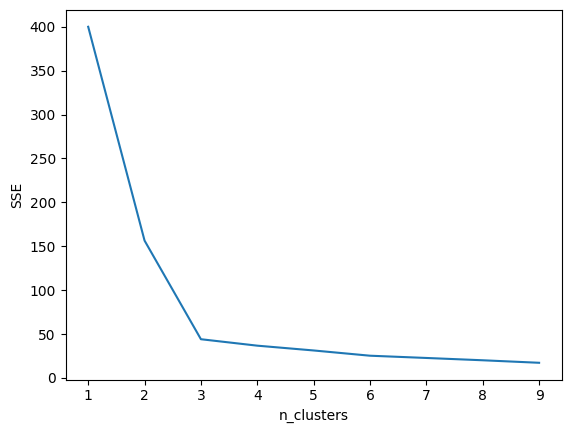

In [94]:
plt.plot(index, sse)
plt.xlabel('n_clusters')
plt.ylabel('SSE')
plt.show()

# 

In [110]:
# evaluasi rand score jika sudah diketahui label dan clusternya

from sklearn import metrics
rand = []
index = range(1,10)
for i in index:
    kmeans = KMeans(n_clusters=i, random_state=30)
    kmeans.fit(x)
    rand_ = metrics.adjusted_rand_score(y, kmeans.labels_)
    rand.append(rand_)
    print(i, rand_)

1 0.0
2 0.5470312575486739
3 0.9850007840499246
4 0.8671007331392205
5 0.7290808818064247
6 0.6193933865917837
7 0.5499701811105182
8 0.45955744132337933
9 0.40728646503412635


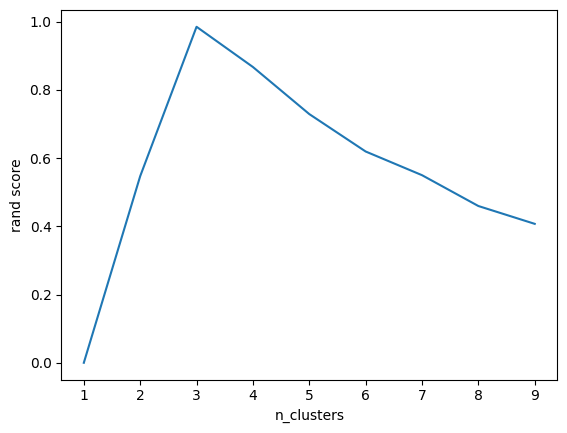

In [111]:
plt.plot(index, rand)
plt.xlabel('n_clusters')
plt.ylabel('rand score')
plt.show()